In [8]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

## Organizing Data

In [ ]:
# import necessary packages
import os
import json
import shutil

In [ ]:
# function to load json files with annotations
def parse_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data


In [ ]:
# function to create subfolders for each species
def subfolders(images_annotations, base_path):
    species_folders = {}

    for each in images_annotations:
        for annotation in each['annotations']:
            species = annotation['label']
            species_folder_path = os.path.join(base_path, species)

            if species not in species_folders:
                if not os.path.exists(species_folder_path):
                    os.makedirs(species_folder_path)
                species_folders[species] = species_folder_path

    return species_folders




In [ ]:
# function to copy images into each subfolder
def copy_images(images_annotations, images_folder_path, species_folders):
    for each in images_annotations:
        image = each['image']
        image_path = os.path.join(images_folder_path, image)

        for annotation in each['annotations']:
            species = annotation['label']
            species_folder_path = species_folders[species]

            # Ensure species folder exists
            if not os.path.exists(species_folder_path):
                os.makedirs(species_folder_path)

            try:
                shutil.copy(image_path, os.path.join(species_folder_path, image))
                print(f"Copied {image} to {species_folder_path}")
            except FileNotFoundError:
                print(f"File not found: {image_path}. Skipping.")




In [ ]:
# specify path to images in Google Drive
train_folder_path = 'YOUR PATH HERE'
validation_folder_path = 'YOUR PATH HERE'


In [ ]:
# Paths to json files
train_annotations_path = os.path.join(train_folder_path, '_annotations.createml.json')
validation_annotations_path = os.path.join(validation_folder_path, '_annotations.createml.json')

# run training and validation folders through functions
train_annotations = parse_json(train_annotations_path)
validation_annotations = parse_json(validation_annotations_path)

train_species_folders = subfolders(train_annotations, train_folder_path)
validation_species_folders = subfolders(validation_annotations, validation_folder_path)

copy_images(train_annotations, train_folder_path, train_species_folders)
copy_images(validation_annotations, validation_folder_path, validation_species_folders)


Copied large-22-_jpg.rf.fbb1cff92280a6404c370fff981bda45.jpg to /content/drive/MyDrive/DS Project/Project 3/Snake Species ID/Snake Images /train/Agkistrodon-contortrix-Eastern-Copperhead
Copied 0e467c2982dfbd841dc944caeded9742_jpg.rf.f98ffd0b0f9086aa23e6e98722310c5b.jpg to /content/drive/MyDrive/DS Project/Project 3/Snake Species ID/Snake Images /train/Thamnophis-sirtalis-Common-Garter-snake
Copied 1850910505f7c755aa724c4f3f8bb3be_jpg.rf.f8b114ab4672fd2c3985a82e3e68d1c2.jpg to /content/drive/MyDrive/DS Project/Project 3/Snake Species ID/Snake Images /train/Thamnophis-sirtalis-Common-Garter-snake
Copied large-21-_jpeg.rf.fca13ab5992e73d966c47479758ef2f3.jpg to /content/drive/MyDrive/DS Project/Project 3/Snake Species ID/Snake Images /train/Crotalus-horridus-Timber-Rattlesnake
Copied 0ed3cc15a462fe4507ff40f5dba1d4be_jpg.rf.f972306cdace28e109961f16eafe86a1.jpg to /content/drive/MyDrive/DS Project/Project 3/Snake Species ID/Snake Images /train/Patherophis-obsoletus-Black-Rat-snake
Copied l

In [ ]:
## do everything for test folder as well
test_folder_path = 'YOUR PATH HERE'

test_annotations_path = os.path.join(test_folder_path, '_annotations.createml.json')

test_annotations = parse_json(test_annotations_path)

test_species_folders = subfolders(test_annotations, test_folder_path)

copy_images(test_annotations, test_folder_path, test_species_folders)


Copied large-31-_jpg.rf.0b678caa2782168859051b6611e94a14.jpg to /content/drive/MyDrive/DS Project/Project 3/Snake Species ID/Snake Images /test/Agkistrodon-contortrix-Eastern-Copperhead
Copied large-5-_jpg.rf.125c3d27e309b09e8a7d2c17c649495d.jpg to /content/drive/MyDrive/DS Project/Project 3/Snake Species ID/Snake Images /test/Crotalus-horridus-Timber-Rattlesnake
Copied large-9-_jpeg.rf.149a62216ad9fb5209f635678a9871f3.jpg to /content/drive/MyDrive/DS Project/Project 3/Snake Species ID/Snake Images /test/Crotalus-horridus-Timber-Rattlesnake
Copied istockphoto-1042127036-612x612_jpg.rf.01ef1fdadc88cf8f26d40dbeaccfb765.jpg to /content/drive/MyDrive/DS Project/Project 3/Snake Species ID/Snake Images /test/Agkistrodon-contortrix-Eastern-Copperhead
Copied 0def4f6ecf0d1a2bb0dd9b6243e41984_jpg.rf.153f4cfd1202eedc7a05adc1d51b8de6.jpg to /content/drive/MyDrive/DS Project/Project 3/Snake Species ID/Snake Images /test/Thamnophis-sirtalis-Common-Garter-snake
Copied large-2-_jpg.rf.27c8950293996ee3

##EDA

In [ ]:
import pandas as pd

# create function to turn json annotations to dataframe
def annotations_to_dataframe(annotations):
    records = []
    for item in annotations:
        image = item.get('image')
        for ann in item.get('annotations', []):
            label = ann.get('label')
            coords = ann.get('coordinates', {})
            records.append({
                'image': image,
                'label': label,
                'x': coords.get('x'),
                'y': coords.get('y'),
                'width': coords.get('width'),
                'height': coords.get('height'),
                'area': coords.get('width') * coords.get('height') if coords.get('width') and coords.get('height') else None
            })
    return pd.DataFrame(records)

# Create DataFrames
train_df = annotations_to_dataframe(train_annotations)
val_df = annotations_to_dataframe(validation_annotations)

train_df.head()


,image,label,x,y,width,height,area
0,large-22-_jpg.rf.fbb1cff92280a6404c370fff981bd...,Agkistrodon-contortrix-Eastern-Copperhead,336.507937,286.984127,433.015873,113.439154,49120.954302
1,0e467c2982dfbd841dc944caeded9742_jpg.rf.f98ffd...,Thamnophis-sirtalis-Common-Garter-snake,293.333333,352.500000,553.333333,531.666666,294188.888343
2,1850910505f7c755aa724c4f3f8bb3be_jpg.rf.f8b114...,Thamnophis-sirtalis-Common-Garter-snake,325.833333,351.666667,355.000000,493.333333,175133.333215
3,large-21-_jpeg.rf.fca13ab5992e73d966c47479758e...,Crotalus-horridus-Timber-Rattlesnake,380.625000,326.666667,281.250000,363.333333,102187.499906
4,0ed3cc15a462fe4507ff40f5dba1d4be_jpg.rf.f97230...,Patherophis-obsoletus-Black-Rat-snake,327.500000,326.666667,565.000000,46.666667,26366.666855


In [ ]:
print("Train:")
print(" - Total Annotations:", len(train_df))
print(" - Unique Images:", train_df['image'].nunique())
print()

print("Validation:")
print(" - Total Images:", len(val_df))
print(" - Unique Images:", val_df['image'].nunique())


Train:
 - Total annotations: 806
 - Unique images: 749

Validation:
 - Total annotations: 83
 - Unique images: 74


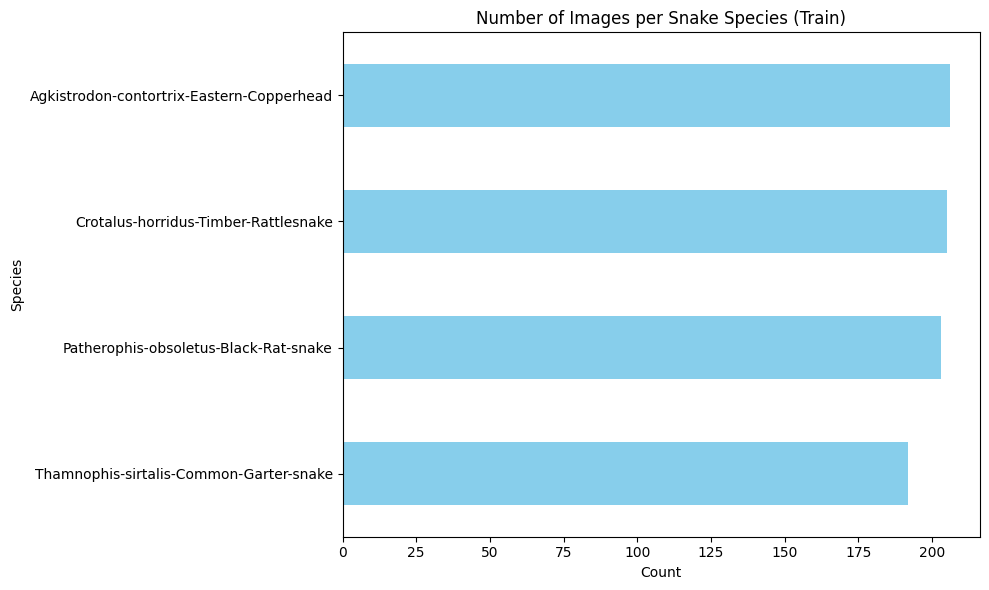

In [ ]:
import matplotlib.pyplot as plt


train_df['label'].value_counts().sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title("Number of Images per Snake Species (Train)")
plt.xlabel("Count")
plt.ylabel("Species")
plt.tight_layout()
plt.show()


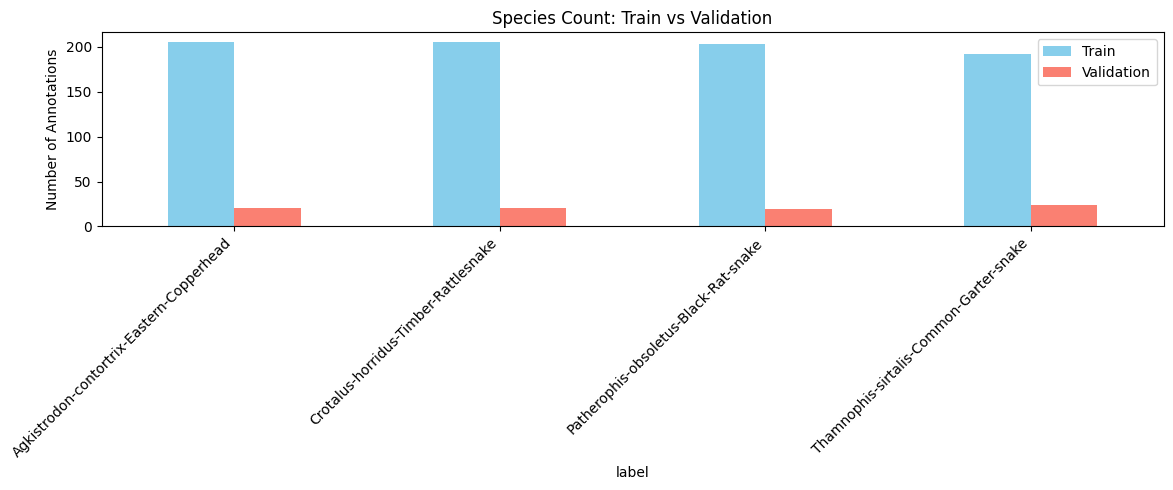

In [ ]:
combined = pd.DataFrame({
    'Train': train_df['label'].value_counts(),
    'Validation': val_df['label'].value_counts()
}).fillna(0)

combined.plot(kind='bar', figsize=(12, 5), color=['skyblue', 'salmon'])
plt.title("Species Count: Train vs Validation")
plt.ylabel("Number of Annotations")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


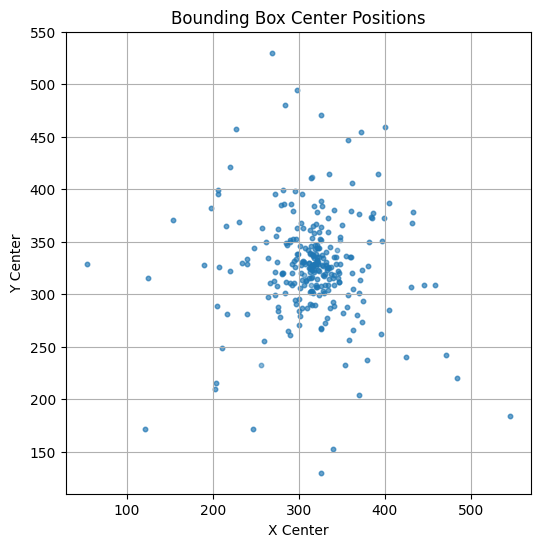

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(train_df['x'], train_df['y'], alpha=0.3, s=10)
plt.title("Bounding Box Center Positions")
plt.xlabel("X Center")
plt.ylabel("Y Center")
plt.grid(True)
plt.show()


## Analysis

In [1]:
# load images
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory

# Image size for resizing
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Load training set
train_ds = image_dataset_from_directory(
    'YOUR PATH HERE',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

# Load validation set
validation_ds = image_dataset_from_directory(
    'YOUR PATH HERE',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

# Load test set
test_ds = image_dataset_from_directory(
    'YOUR PATH HERE',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    shuffle=False
)


Found 749 files belonging to 4 classes.
Found 74 files belonging to 4 classes.
Found 33 files belonging to 4 classes.


In [2]:
from tensorflow.keras import layers

# data augmentation layer
## random transformations for data variability
data_aug = keras.Sequential([
    layers.Rescaling(1./255),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomBrightness(0.2)
])

In [3]:
# package for model building
from tensorflow.keras.applications import ResNet50

# pre-trained resnet50 model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False  # only new top layers trained

# build final model
final_model = keras.Sequential([
    data_aug,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_ds.element_spec[1].shape[-1], activation='softmax')
])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
from tensorflow.keras.callbacks import EarlyStopping

# Adam optimizer and categorical crossentropy
final_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# training the model, stops early if validation loss doesn't improve
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# trains model with train and validation sets
history = final_model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=25,
    callbacks=[early_stop]
)


Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 185s 7s/step - accuracy: 0.2254 - loss: 1.6904 - val_accuracy: 0.2973 - val_loss: 1.4271
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 192s 7s/step - accuracy: 0.3019 - loss: 1.4783 - val_accuracy: 0.4324 - val_loss: 1.3525
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 204s 7s/step - accuracy: 0.2976 - loss: 1.4358 - val_accuracy: 0.3378 - val_loss: 1.3665
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 202s 7s/step - accuracy: 0.2841 - loss: 1.4515 - val_accuracy: 0.2838 - val_loss: 1.3939
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 204s 7s/step - accuracy: 0.2708 - loss: 1.4262 - val_accuracy: 0.3108 - val_loss: 1.3150
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 202s 7s/step - accuracy: 0.3260 - loss: 1.3464 - val_accuracy: 0.4324 - val_loss: 1.2754
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 200s 7s/step - accuracy: 0.3318 - loss: 1.3623 - val_accuracy: 0.4459 - val_loss: 1.2593
Epoch 8/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 202s 7s/step - accuracy: 0.3018 - loss: 1.3913 - val_accuracy: 0.4324 - v

In [6]:
from sklearn.metrics import classification_report
import numpy as np

# evaluate performance on test set
test_loss, test_accuracy = final_model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# model predictions
predictions = final_model.predict(test_ds)
y_pred = np.argmax(predictions, axis=1)

# actual image labels
y_true = np.concatenate([y for x, y in test_ds])
y_true = np.argmax(y_true, axis=1)

# get labels
class_labels = test_ds.class_names

## classification report
print(classification_report(y_true, y_pred, target_names=class_labels))


2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 204ms/step - accuracy: 0.4182 - loss: 1.1481
Test Accuracy: 42.42%
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 306ms/step
                                           precision    recall  f1-score   support

Agkistrodon-contortrix-Eastern-Copperhead       0.47      0.89      0.62         9
     Crotalus-horridus-Timber-Rattlesnake       0.00      0.00      0.00         9
    Patherophis-obsoletus-Black-Rat-snake       0.00      0.00      0.00         7
  Thamnophis-sirtalis-Common-Garter-snake       0.50      0.75      0.60         8

                                 accuracy                           0.42        33
                                macro avg       0.24      0.41      0.30        33
                             weighted avg       0.25      0.42      0.31        33



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


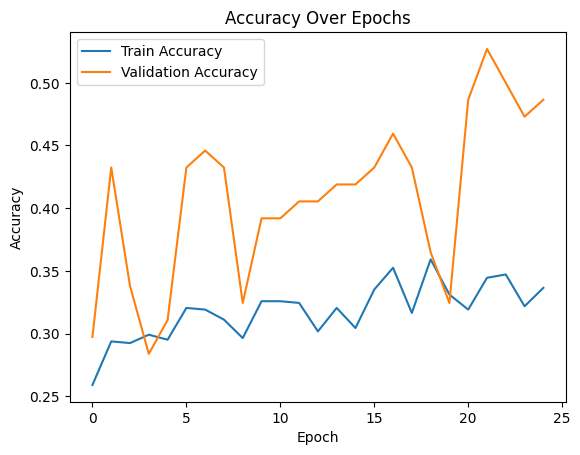

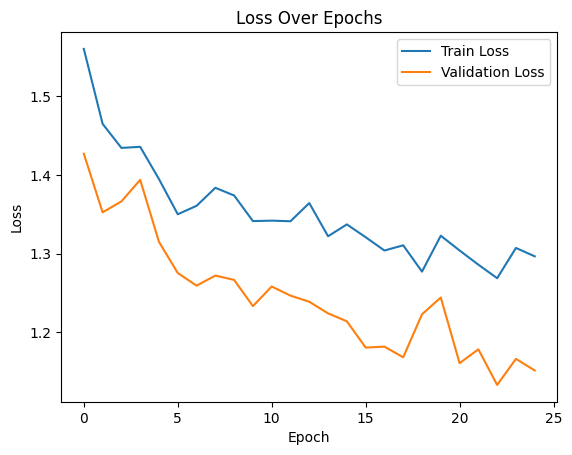

In [7]:
import matplotlib.pyplot as plt

# plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
